In [5]:
import pandas as pd
df = pd.read_csv("NEW_Keywords_emergency.csv")
df

,index,selftext,num_comments,score,title,type
0,273,"○ 20% for SAVINGS: Debt repayments, emergency ...",0,1,Isn't it time for you to make a plan in managi...,Adult
1,1468,Our living situation makes it easy to live on ...,0,2,Time to Start Making Changes,Adult
2,3444,My Husband also quit his job bc his previous j...,15,3,What do I do?,Adult
3,4122,"My parents also have an emergency fund, so inc...",8,7,I am a 15 year old and I need to know what to ...,Adult
4,4311,I want to start trying to save some money for ...,5,1,Which big bank is the best for starting a savi...,Adult
...,...,...,...,...,...,...
961,29300,"We also have an emergency fund of $10,000 that...",14,1,Pay down on current house or continue saving?,Finance
962,29306,I'm trying to step up and make a budget so I c...,5,1,28 and living with parents. How should I size ...,Finance
963,29350,"That way I'd still have that $5,000 emergency ...",38,1,"I have $20,000 dollars just sitting in a norma...",Finance
964,29362,"We have a 6 month emergency fund, contribute 1...",44,1,Worth it to Pay Down Mortgage to Save for a Do...,Finance


In [6]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [7]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [8]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0      20% for SAVINGS: Debt repayments, emergency fu...
1      Our living situation make it easy to live on m...
2      My Husband also quit his job bc his previous j...
3      My parent also have an emergency fund, so inca...
4      I want to start trying to save some money for ...
                             ...                        
961    We also have an emergency fund of 10,000 that ...
962    I'm trying to step up and make a budget so I c...
963    That way I'd still have that 5,000 emergency f...
964    We have a 6 month emergency fund, contribute 1...
965    On top, the 5k that we keep in the cash accoun...
Name: selftext, Length: 966, dtype: object

In [9]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,"20% for SAVINGS: Debt repayments, emergency fu..."
1,1,Our living situation make it easy to live on m...
2,2,My Husband also quit his job bc his previous j...
3,3,"My parent also have an emergency fund, so inca..."
4,4,I want to start trying to save some money for ...
...,...,...
961,961,"We also have an emergency fund of 10,000 that ..."
962,962,I'm trying to step up and make a budget so I c...
963,963,"That way I'd still have that 5,000 emergency f..."
964,964,"We have a 6 month emergency fund, contribute 1..."


In [10]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,000 emergency,10,10 000,100,1000,100k,10k,10k emergency,12,...,wife,wondering,work,working,worth,x200b,year,years,yield,yield saving
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.337115,0.000000,0.386412,0.508376,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963,0.436787,0.593273,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.000000,0.000000,0.198136,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.decomposition import NMF

model1=NMF(n_components=4,init="random",random_state=1)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=4, random_state=1)

In [24]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [25]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),
                   'Topic 3':top_words(count_df1, model1, 3, 10)})
topic1

,Topic 0,Topic 1,Topic 2,Topic 3
0,10k,credit,saving emergency,expenses
1,savings,student,fund saving,month expense
2,need,401k,yield saving,savings
3,want,pay,high yield,fund month
4,cash,ira,yield,expense
5,like,roth,high,emergency
6,money,loan,account emergency,emergency fund
7,emergency,000,saving account,fund
8,emergency fund,year,saving,month emergency
9,fund,debt,account,month


Topic 0: need/want emergency fund \
Topic 1: roth ira/401k \
Topic 2: high yield/saving emergency
Topic 3: month expense 

In [26]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]
t3=X[X.topic==3]

## Compare Emotion across topics

In [27]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [28]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2

d=sent_df(t3)
d['topic']=3


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
final=pd.concat([a,b,c,d],axis=0)
final.total.describe()

count    966.000000
mean      -0.079250
std        0.207994
min       -1.298851
25%       -0.173709
50%       -0.063000
75%        0.024745
max        0.951899
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'), Text(0.5, 1.0, 'Sentiment Score by topics')]

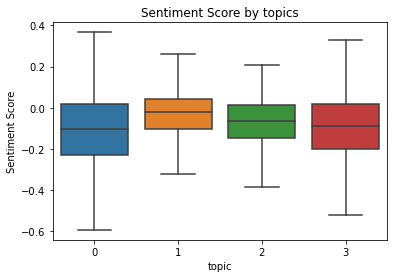

In [41]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by topics")

## Most common positive/negative words

In [31]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [32]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [33]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,59
1,saved,55
2,save,42
3,credit,41
4,good,34
0,emergency,624
1,debt,98
2,no,78
3,pay,67
4,low,22


In [34]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,23
1,saved,15
2,save,14
3,want,13
4,good,12
0,emergency,273
1,no,24
2,debt,19
3,pay,18
4,sure,8


In [35]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,29
1,saved,25
2,like,19
3,interest,18
4,ha,17
0,emergency,149
1,debt,61
2,no,36
3,pay,36
4,low,12


In [36]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,12
1,well,7
2,saved,5
3,good,5
4,pretty,5
0,emergency,110
1,debt,9
2,no,8
3,pay,5
4,leave,4


In [37]:
positive,negative=sort_pn(d)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,save,10
1,saved,10
2,credit,6
3,like,5
4,worth,5
0,emergency,92
1,no,10
2,debt,9
3,pay,8
4,low,2


## Word Frequency splitted by sentiment

In [38]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [39]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [42]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.109797]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.001208]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(             words  count
 0   emergency fund    188
 1  emergency fund,     48
 2  emergency fund.     43
 3  month emergency     27
 4          6 month     23
 5   saving account     21
 6           fund I     20
 7         Roth IRA     19
 8      credit card     18
 9             I wa     17,
              words  count
 0   emergency fund    435
 1  emergency fund.    134
 2  emergency fund,    125
 3  month emergency     82
 4          6 month     59
 5   saving account     43
 6          fund. I     36
 7      I emergency     32
 8           fund I     32
 9         Roth IRA     29)

In [43]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(             words  count
 0   emergency fund     69
 1  emergency fund.     23
 2  emergency fund,     16
 3           fund I      9
 4      I emergency      8
 5          fund. I      7
 6  saved emergency      6
 7           I feel      5
 8          I still      5
 9   good emergency      5,
              words  count
 0   emergency fund    206
 1  emergency fund.     77
 2  emergency fund,     46
 3      I emergency     25
 4          fund. I     23
 5           fund I     17
 6  emergency fund?     15
 7        set aside     13
 8  money emergency     12
 9    10k emergency      9)

In [44]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(             words  count
 0   emergency fund     62
 1  emergency fund,     16
 2      credit card     16
 3     student loan     14
 4         Roth IRA     13
 5  emergency fund.     12
 6      I currently      7
 7             I wa      7
 8            I pay      7
 9  saved emergency      6,
              words  count
 0   emergency fund     83
 1  emergency fund,     41
 2         Roth IRA     23
 3     student loan     21
 4      credit card     19
 5  emergency fund.     12
 6      I currently     10
 7         max Roth      8
 8        card debt      7
 9  month emergency      7)

In [45]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(              words  count
 0    emergency fund     27
 1    saving account     19
 2   emergency fund,     11
 3          Roth IRA      5
 4            I feel      5
 5         set aside      4
 6  saving emergency      4
 7   emergency fund.      4
 8       fund saving      4
 9        high yield      4,
                words  count
 0     emergency fund     80
 1     saving account     42
 2    emergency fund.     25
 3    emergency fund,     15
 4   saving emergency     15
 5  account emergency     13
 6         high yield     12
 7       yield saving     11
 8              I put     10
 9    month emergency      9)

In [46]:
p,n=pn_freq(final[final.topic==3])
p.head(10),n.head(10)

(             words  count
 0   emergency fund     30
 1  month emergency     20
 2          6 month     15
 3  emergency fund,      5
 4           I save      5
 5  emergency fund.      4
 6         lump sum      3
 7    month expense      3
 8    expense saved      3
 9        3000 euro      3,
              words  count
 0   emergency fund     66
 1  month emergency     63
 2          6 month     41
 3  emergency fund,     23
 4  emergency fund.     20
 5    month expense      9
 6          3 month      7
 7        I already      6
 8      fund around      6
 9           fund I      5)

## Topic Modeling after sentiment splitting

In [51]:
final.total.describe()

count    966.000000
mean      -0.079250
std        0.207994
min       -1.298851
25%       -0.173709
50%       -0.063000
75%        0.024745
max        0.951899
Name: total, dtype: float64

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']>0.024745]) #positive
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,000 emergency,10,10 000,100,100k,10k,10k emergency,11,11k,...,working,worry,worth,x200b,year,yearly,years,yield,yield saving,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.255229,0.0,0.0,0.0
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.295979,0.0,0.0,0.000000,0.0,0.0,0.0


In [56]:
from sklearn.decomposition import NMF

model1=NMF(n_components=4,init="random",random_state=1)
model1.fit(count_df1)

NMF(init='random', n_components=4, random_state=1)

In [57]:
topic2=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),
                   'Topic 3':top_words(count_df1, model1, 3, 10)})
topic2
# 'Topic 4':top_words(count_df1, model1, 4, 10),
#                     'Topic 5':top_words(count_df1, model1, 5, 10)

,Topic 0,Topic 1,Topic 2,Topic 3
0,student,high,saved emergency,option
1,credit,emergency fund,retirement,sure
2,roth ira,fund saving,save,live
3,payment,emergency,money,better
4,pay,aside,month emergency,make
5,401k,fund,month,emergency
6,loan,money,saved,fund
7,ira,saving account,emergency,emergency fund
8,roth,account,emergency fund,good emergency
9,year,saving,fund,good


pay house/loan/car \
retirement \
credit card \
school friend feel

In [58]:
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(final['text'][final['label']<-0.173709]) #negative
counts=counts.toarray()
count_df2=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df2

,000,000 emergency,10,10 000,100,1000,10k,10k emergency,12,12 month,...,wondering,work,working,worth,x200b,year,year emergency,years,yield,yield saving
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.136322,0.0,0.0,0.0,0.0
631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317421,0.382665,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [59]:
model2=NMF(n_components=4,init="random",random_state=0)
model2.fit(count_df2)

NMF(init='random', n_components=4, random_state=0)

In [60]:
topic3=pd.DataFrame({'Topic 0':top_words(count_df2, model2, 0, 10),
                   'Topic 1':top_words(count_df2, model2, 1, 10),
                   'Topic 2':top_words(count_df2, model2, 2, 10),
                   'Topic 3':top_words(count_df2, model2, 3, 10)})
topic3

,Topic 0,Topic 1,Topic 2,Topic 3
0,pay,student,funds,payment
1,built,401k,saving emergency,savings
2,money emergency,pay,yield saving,month expense
3,invest,currently,high yield,expense
4,10k,ira,yield,fund month
5,cash,loan,high,emergency fund
6,money,roth,account emergency,emergency
7,emergency,year,saving account,fund
8,emergency fund,debt,saving,month emergency
9,fund,000,account,month


live home/parent \
credit card and insurance \
retirement \
parent talking

## Find all adj. related to parent

In [78]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
sentence=df['selftext'].apply(lambda x: sent_tokenize(x))

In [79]:
def extract_parent(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'emergency fund' in i: 
            L.append(i)
    return L

In [82]:
parent_sentence=sentence.apply(lambda x: extract_parent(x))
' '.join(parent_sentence[3])

'My parent also have an emergency fund, so incase I lose my job I can ask them for money (not a lot, but a small amount).My reason for moving are my grandparents, they are HORRIBLE and my parent refuse to cut them out.'

In [99]:
parent_sentence[10]

['I want to start investing in a more structured way so I cashed out everything I had in my investment account and I want to set up everything in a more logical way.Now, of those 11k, 5k will be my emergency fund.']

In [102]:
import nltk
#tokens=nltk.word_tokenize('I am Horrible')
tokens=nltk.word_tokenize(parent_sentence[10][0])
print(tokens)

['I', 'want', 'to', 'start', 'investing', 'in', 'a', 'more', 'structured', 'way', 'so', 'I', 'cashed', 'out', 'everything', 'I', 'had', 'in', 'my', 'investment', 'account', 'and', 'I', 'want', 'to', 'set', 'up', 'everything', 'in', 'a', 'more', 'logical', 'way.Now', ',', 'of', 'those', '11k', ',', '5k', 'will', 'be', 'my', 'emergency', 'fund', '.']


In [103]:
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('start', 'VB'),
 ('investing', 'VBG'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('more', 'RBR'),
 ('structured', 'JJ'),
 ('way', 'NN'),
 ('so', 'IN'),
 ('I', 'PRP'),
 ('cashed', 'VBD'),
 ('out', 'RP'),
 ('everything', 'NN'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('investment', 'NN'),
 ('account', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('set', 'VB'),
 ('up', 'RP'),
 ('everything', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('more', 'RBR'),
 ('logical', 'JJ'),
 ('way.Now', 'NN'),
 (',', ','),
 ('of', 'IN'),
 ('those', 'DT'),
 ('11k', 'CD'),
 (',', ','),
 ('5k', 'CD'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('my', 'PRP$'),
 ('emergency', 'NN'),
 ('fund', 'NN'),
 ('.', '.')]

In [104]:
#nltk.download('averaged_perceptron_tagger')
def extract_adj(sentence_ele):
    adjs=[]
    for i in sentence_ele:
        tokens=nltk.word_tokenize(i)
        df_type=pd.DataFrame(nltk.pos_tag(tokens),columns=['words', 'type'])
        adjs=list(df_type[df_type.type=='JJ'].words)
    return ' '.join(adjs)

In [105]:
adjs=parent_sentence.apply(lambda x: extract_adj(x))

In [106]:
adjs

0                                                       
1                                       easy much little
2                                        previous broken
3                                           incase small
4                                                   sure
                             ...                        
961                                                     
962                                             much 3-6
963                                                     
964                                                     
965    additional available immediate penalty-free ab...
Name: selftext, Length: 966, dtype: object

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_df=0.5,min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(adjs)
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
#count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,able,additional,big,comfortable,current,decent,extra,financial,free,funded,...,personal,possible,separate,short,single,small,solid,sure,taxable,total
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
from sklearn.decomposition import NMF

model1=NMF(n_components=3,init="random",random_state=0)
model1.fit(count_df1)

NMF(init='random', n_components=3, random_state=0)

In [109]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10)})
topic1

,Topic 0,Topic 1,Topic 2
0,financial,free,comfortable
1,personal,short,small
2,decent,long,financial
3,free,monthly,long
4,long,low,little
5,current,separate,monthly
6,solid,taxable,new
7,small,month,able
8,sure,sure,extra
9,good,high,current


In [110]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(adjs).head(20)

,words,count
0,other,64
1,*,62
2,good,49
3,high,42
4,current,41
5,down,41
6,next,37
7,new,35
8,able,33
9,extra,32


In [111]:
stop_words.update({'i','*','im','’','much'})
adjs=adjs.apply(lambda x: remove_stopwords(x))
count_df=count_words(adjs)
count_df.head(10)

,words,count
0,good,49
1,high,42
2,current,41
3,next,37
4,new,35
5,able,33
6,extra,32
7,small,28
8,low,28
9,full,28
